In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("police.csv")

In [3]:
df.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [5]:
df=df.drop("county_name", axis=1)

In [6]:
c=df.columns
c

Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

In [7]:
for i in c:
    print(i, "=====>", df[i].unique())

state =====> ['RI']
stop_date =====> ['2005-01-04' '2005-01-23' '2005-02-17' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
stop_time =====> ['12:55' '23:15' '04:15' ... '05:22' '04:56' '05:38']
driver_gender =====> ['M' 'F' nan]
driver_race =====> ['White' nan 'Asian' 'Black' 'Hispanic' 'Other']
violation_raw =====> ['Equipment/Inspection Violation' 'Speeding' 'Call for Service' nan
 'Other Traffic Violation' 'Registration Violation'
 'Special Detail/Directed Patrol' 'APB' 'Motorist Assist/Courtesy'
 'Suspicious Person' 'Violation of City/Town Ordinance' 'Warrant'
 'Seatbelt Violation']
violation =====> ['Equipment' 'Speeding' 'Other' nan 'Moving violation'
 'Registration/plates' 'Seat belt']
search_conducted =====> [False  True]
search_type =====> [nan 'Probable Cause' 'Incident to Arrest'
 'Incident to Arrest,Probable Cause' 'Protective Frisk'
 'Probable Cause,Protective Frisk,Reasonable Suspicion'
 'Reasonable Suspicion' 'Incident to Arrest,Protective Frisk'
 'Inventory,Protective Fr

In [8]:
df=df.drop("state", axis=1)

In [9]:
df["search_type"] = df["search_type"].fillna("did not search")

In [10]:
import missingno as mns

<AxesSubplot:>

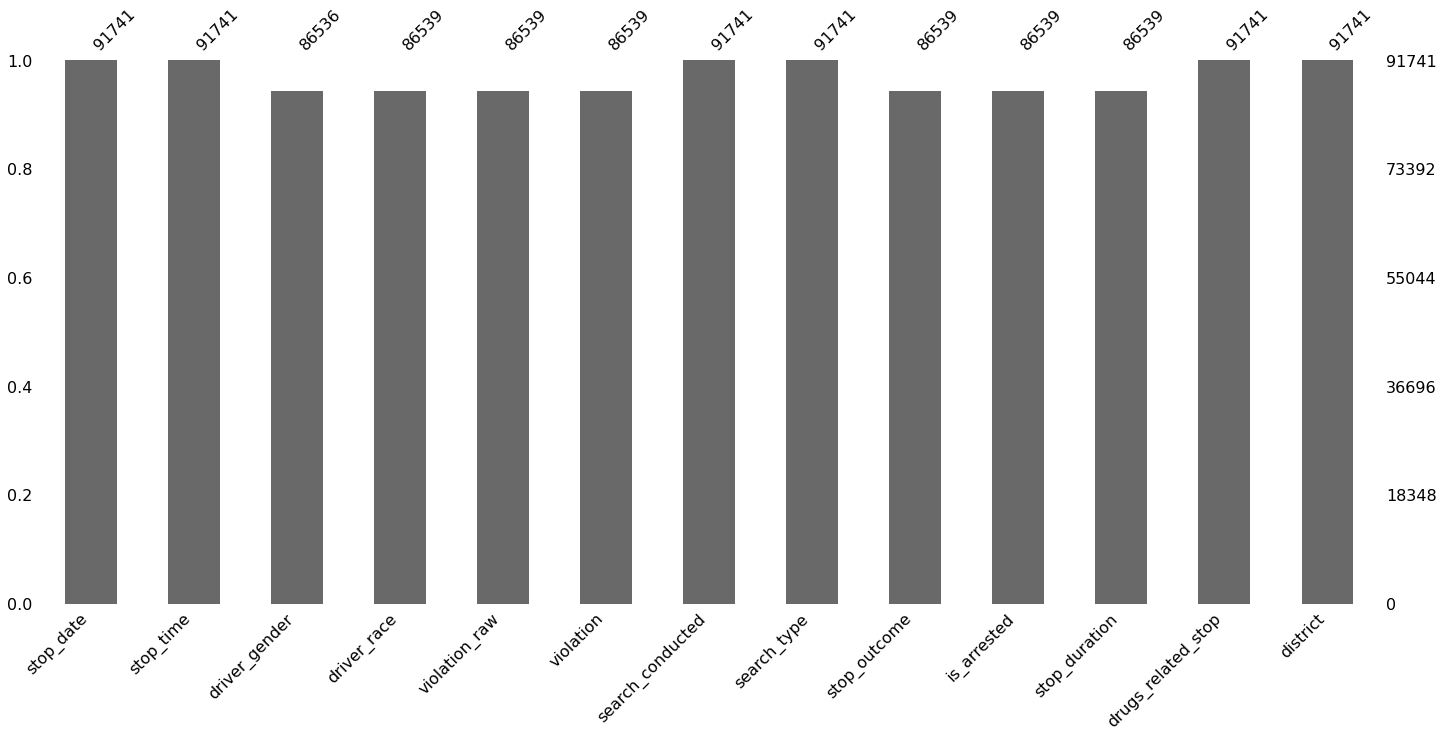

In [11]:
mns.bar(df)

<AxesSubplot:>

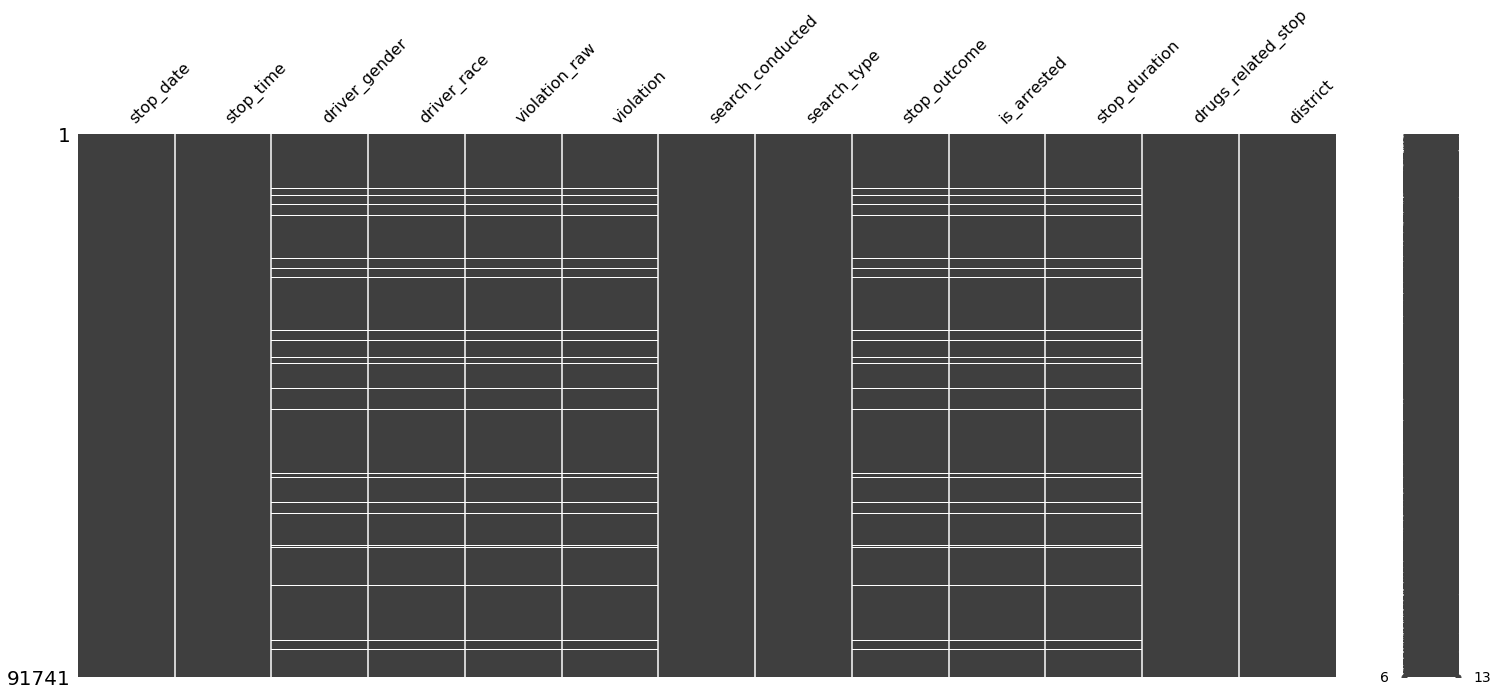

In [12]:
mns.matrix(df)

In [13]:
df=df.dropna(subset=["stop_outcome"])

<AxesSubplot:>

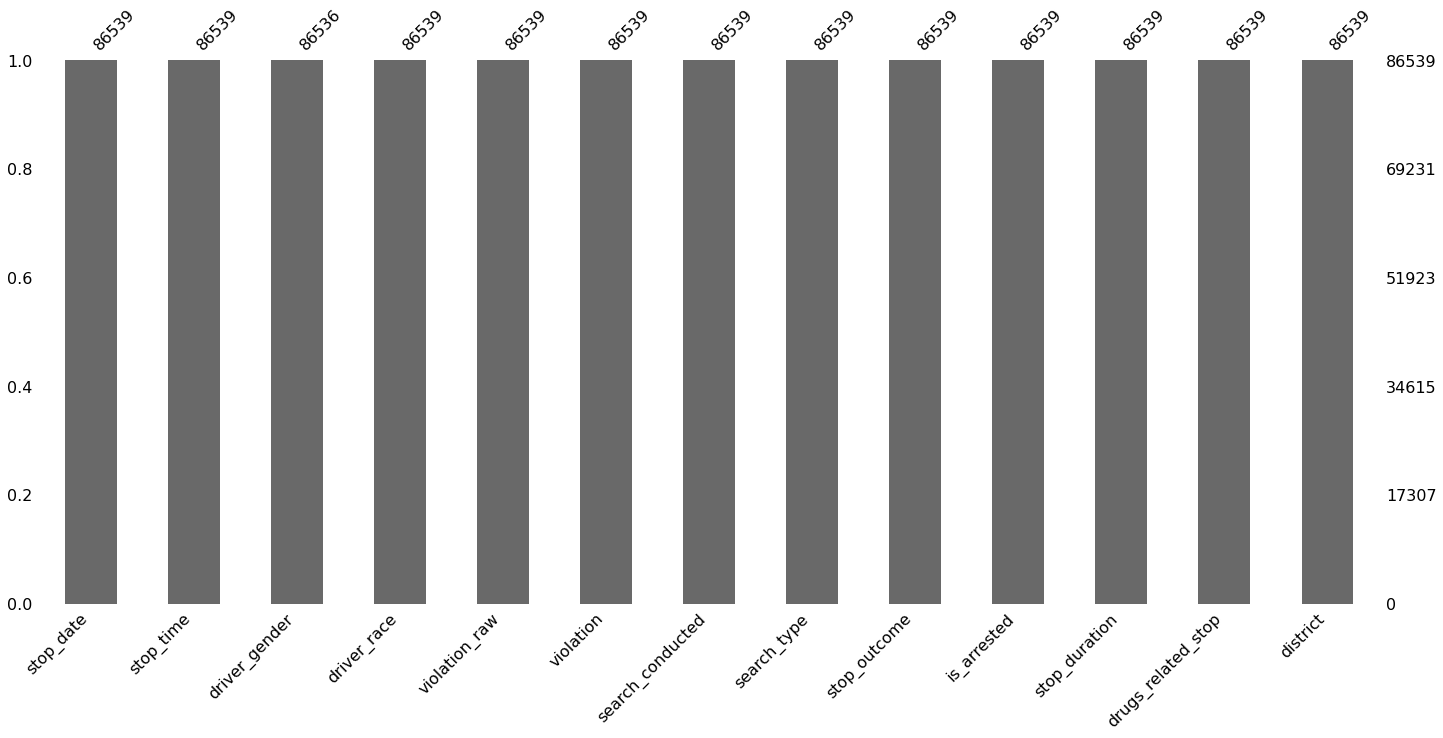

In [14]:
mns.bar(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86539 entries, 0 to 91740
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_date           86539 non-null  object
 1   stop_time           86539 non-null  object
 2   driver_gender       86536 non-null  object
 3   driver_race         86539 non-null  object
 4   violation_raw       86539 non-null  object
 5   violation           86539 non-null  object
 6   search_conducted    86539 non-null  bool  
 7   search_type         86539 non-null  object
 8   stop_outcome        86539 non-null  object
 9   is_arrested         86539 non-null  object
 10  stop_duration       86539 non-null  object
 11  drugs_related_stop  86539 non-null  bool  
 12  district            86539 non-null  object
dtypes: bool(2), object(11)
memory usage: 8.1+ MB


In [16]:
com=df["stop_date"].str.cat(df["stop_time"], sep=" ")
df["stop_datetime"]=pd.to_datetime(com)

In [17]:
df.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,stop_datetime
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,did not search,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,2005-01-23,23:15,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,2005-02-17,04:15,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,2005-02-20,17:15,M,White,Call for Service,Other,False,did not search,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,2005-02-24,01:20,F,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00


In [18]:
df.set_index("stop_datetime", inplace=True)

In [19]:
df.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,did not search,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,did not search,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X3


In [20]:
df=df.drop(["stop_date", "stop_time"], axis=1)

In [21]:
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,did not search,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,did not search,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X3


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86539 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   driver_gender       86536 non-null  object
 1   driver_race         86539 non-null  object
 2   violation_raw       86539 non-null  object
 3   violation           86539 non-null  object
 4   search_conducted    86539 non-null  bool  
 5   search_type         86539 non-null  object
 6   stop_outcome        86539 non-null  object
 7   is_arrested         86539 non-null  object
 8   stop_duration       86539 non-null  object
 9   drugs_related_stop  86539 non-null  bool  
 10  district            86539 non-null  object
dtypes: bool(2), object(9)
memory usage: 6.8+ MB


In [23]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

In [24]:
data=df.copy()

In [25]:
c=df.columns
c

Index(['driver_gender', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'district'],
      dtype='object')

In [26]:
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,did not search,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,did not search,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X3


In [27]:
for i in c:
    print(i, "=====>", df[i].unique())

driver_gender =====> ['M' 'F' nan]
driver_race =====> ['White' 'Asian' 'Black' 'Hispanic' 'Other']
violation_raw =====> ['Equipment/Inspection Violation' 'Speeding' 'Call for Service'
 'Other Traffic Violation' 'Registration Violation'
 'Special Detail/Directed Patrol' 'APB' 'Motorist Assist/Courtesy'
 'Suspicious Person' 'Violation of City/Town Ordinance' 'Warrant'
 'Seatbelt Violation']
violation =====> ['Equipment' 'Speeding' 'Other' 'Moving violation' 'Registration/plates'
 'Seat belt']
search_conducted =====> [False  True]
search_type =====> ['did not search' 'Probable Cause' 'Incident to Arrest'
 'Incident to Arrest,Probable Cause' 'Protective Frisk'
 'Probable Cause,Protective Frisk,Reasonable Suspicion'
 'Reasonable Suspicion' 'Incident to Arrest,Protective Frisk'
 'Inventory,Protective Frisk' 'Inventory' 'Incident to Arrest,Inventory'
 'Inventory,Probable Cause' 'Protective Frisk,Reasonable Suspicion'
 'Probable Cause,Reasonable Suspicion'
 'Incident to Arrest,Inventory,Protec

In [28]:
df=df.dropna(subset=["driver_gender"])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 86536 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   driver_gender       86536 non-null  object
 1   driver_race         86536 non-null  object
 2   violation_raw       86536 non-null  object
 3   violation           86536 non-null  object
 4   search_conducted    86536 non-null  bool  
 5   search_type         86536 non-null  object
 6   stop_outcome        86536 non-null  object
 7   is_arrested         86536 non-null  object
 8   stop_duration       86536 non-null  object
 9   drugs_related_stop  86536 non-null  bool  
 10  district            86536 non-null  object
dtypes: bool(2), object(9)
memory usage: 6.8+ MB


In [30]:
for i in c:
    df[i]=en.fit_transform(df[i])
    name_mapping = dict(zip(en.classes_, en.transform(en.classes_)))
    print(i, "===>", name_mapping)

driver_gender ===> {'F': 0, 'M': 1}
driver_race ===> {'Asian': 0, 'Black': 1, 'Hispanic': 2, 'Other': 3, 'White': 4}
violation_raw ===> {'APB': 0, 'Call for Service': 1, 'Equipment/Inspection Violation': 2, 'Motorist Assist/Courtesy': 3, 'Other Traffic Violation': 4, 'Registration Violation': 5, 'Seatbelt Violation': 6, 'Special Detail/Directed Patrol': 7, 'Speeding': 8, 'Suspicious Person': 9, 'Violation of City/Town Ordinance': 10, 'Warrant': 11}
violation ===> {'Equipment': 0, 'Moving violation': 1, 'Other': 2, 'Registration/plates': 3, 'Seat belt': 4, 'Speeding': 5}
search_conducted ===> {False: 0, True: 1}
search_type ===> {'Incident to Arrest': 0, 'Incident to Arrest,Inventory': 1, 'Incident to Arrest,Inventory,Probable Cause': 2, 'Incident to Arrest,Inventory,Protective Frisk': 3, 'Incident to Arrest,Inventory,Reasonable Suspicion': 4, 'Incident to Arrest,Probable Cause': 5, 'Incident to Arrest,Probable Cause,Protective Frisk': 6, 'Incident to Arrest,Probable Cause,Reasonable Su

In [31]:
data.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,M,White,Equipment/Inspection Violation,Equipment,False,did not search,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,M,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,M,White,Call for Service,Other,False,did not search,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,F,White,Speeding,Speeding,False,did not search,Citation,False,0-15 Min,False,Zone X3


In [32]:
df.head()

,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,
2005-01-04 12:55:00,1,4,2,0,0,25,2,0,0,0,5
2005-01-23 23:15:00,1,4,8,5,0,25,2,0,0,0,2
2005-02-17 04:15:00,1,4,8,5,0,25,2,0,0,0,5
2005-02-20 17:15:00,1,4,1,2,0,25,0,1,1,0,3
2005-02-24 01:20:00,0,4,8,5,0,25,2,0,0,0,4


# Problem 1: Search Conduct or Not
# Problem 2: Search Type Prediction
# Problem 3: Search Outcome
# Problem 4: Arrested or Not

In [33]:
from sklearn.model_selection import train_test_split

## Problem 1

In [34]:
pr1=df.copy()

In [35]:
pr1.columns

Index(['driver_gender', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'district'],
      dtype='object')

In [36]:
pr1_fe=pr1[["driver_gender", "driver_race", "violation_raw", "violation", "district"]].values

In [37]:
pr1_tar=pr1["search_conducted"].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(pr1_fe, pr1_tar, test_size=0.2, random_state=42, stratify=pr1_tar)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=3)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
knn.score(X_test, y_test)

0.9573607580309683

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
y_pred=knn.predict(X_test)

In [45]:
confusion_matrix(y_test, y_pred)

array([[16568,    79],
       [  659,     2]])

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     16647
           1       0.02      0.00      0.01       661

    accuracy                           0.96     17308
   macro avg       0.49      0.50      0.49     17308
weighted avg       0.93      0.96      0.94     17308



In [47]:
count_0, count_1 = pr1["search_conducted"].value_counts()
count_0, count_1

(83229, 3307)

In [48]:
pr_0=pr1[pr1["search_conducted"]==0]

In [49]:
pr_1=pr1[pr1["search_conducted"]==1]

In [50]:
pr_1.shape

(3307, 11)

In [51]:
pr_0_under=pr_0.sample(count_1)

In [52]:
pr_0_under.shape

(3307, 11)

In [53]:
under_sample_data = pd.concat([pr_0_under, pr_1], axis=0)

In [54]:
under_sample_data.shape

(6614, 11)

In [55]:
X=under_sample_data[["driver_gender", "driver_race", "violation_raw", "violation", "district"]].values

In [56]:
y=under_sample_data["search_conducted"].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [59]:
knn.score(X_test, y_test)

0.6303854875283447

In [60]:
y_pred=knn.predict(X_test)

In [61]:
confusion_matrix(y_test, y_pred)

array([[418, 244],
       [245, 416]])

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       662
           1       0.63      0.63      0.63       661

    accuracy                           0.63      1323
   macro avg       0.63      0.63      0.63      1323
weighted avg       0.63      0.63      0.63      1323



In [63]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [64]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

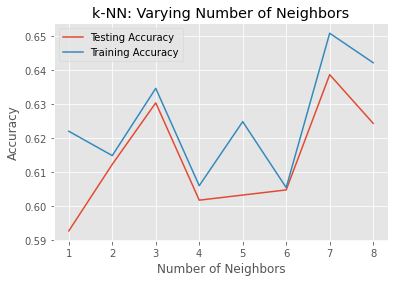

In [65]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [66]:
pr_1_over=pr_1.sample(count_0, replace=True)

In [67]:
pr_1_over.shape

(83229, 11)

In [68]:
over_sample_data = pd.concat([pr_0, pr_1_over], axis=0)

In [69]:
over_sample_data.shape

(166458, 11)

In [70]:
X=over_sample_data[["driver_gender", "driver_race", "violation_raw", "violation", "district"]].values

In [71]:
y=over_sample_data["search_conducted"].values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [74]:
knn.score(X_test, y_test)

0.6404541631623213

In [75]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

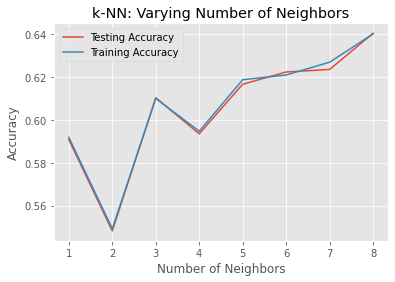

In [76]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [77]:
from imblearn.over_sampling import SMOTE

In [78]:
smt = SMOTE()

In [79]:
X=pr1[["driver_gender", "driver_race", "violation_raw", "violation", "district"]]
y=pr1["search_conducted"]

In [80]:
X_sm, y_sm = smt.fit_resample(X, y)

In [87]:
y_sm.value_counts()

0    83229
1    83229
Name: search_conducted, dtype: int64

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

In [90]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [91]:
knn.score(X_test, y_test)

0.6445091913973326

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
cv_results=cross_val_score(knn, pr1_fe, pr1_tar, cv=5)

In [85]:
cv_results

array([0.96175179, 0.96180736, 0.96180736, 0.96180736, 0.96157624])

In [86]:
np.mean(cv_results)

0.9617500230913378